In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df_train = pd.read_csv('train_advanced.csv', encoding='utf8')
df_test = pd.read_csv('test_advanced.csv', encoding='utf8')

In [ ]:
# df_train = df_train.set_index('Date')
# df_test = df_test.set_index('Date')

In [ ]:
df_train

In [4]:
df_train.iloc[:,[0,1,2]+[4,5,6,7]]

,Date,Store,Item,Average Rating,Location,Category,Branding
0,1/1/2017,KMart,1,2.8,Wheelers Hill VIC 3170,Electronics,Sony
1,1/2/2017,KMart,1,1.4,Wheelers Hill VIC 3170,Electronics,Sony
2,1/3/2017,KMart,1,1.8,Wheelers Hill VIC 3170,Electronics,Sony
3,1/4/2017,KMart,1,1.3,Wheelers Hill VIC 3170,Electronics,Sony
4,1/5/2017,KMart,1,2.9,Wheelers Hill VIC 3170,Electronics,Sony
...,...,...,...,...,...,...,...
820995,6/26/2021,SupaIGA,50,0.4,NaN,Home & Kitchen,Westinghouse
820996,6/27/2021,SupaIGA,50,0.8,NaN,Home & Kitchen,Westinghouse
820997,6/28/2021,SupaIGA,50,2.0,NaN,Home & Kitchen,Westinghouse
820998,6/29/2021,SupaIGA,50,1.9,NaN,Home & Kitchen,Westinghouse


In [5]:
features = df_train.iloc[:,[0,1,2]+[4,5,6,7]]
target = df_train.iloc[:,3]

### Missing values

In [ ]:
print(features.describe())
print(features.describe(include='O'))

Location column has some missing values 

In [ ]:
features.Store.unique()

In [6]:
features[features.Store == 'KMart'].Location.unique()

array(['Wheelers Hill VIC 3170'], dtype=object)

In [7]:
features[features.Store == 'Coles'].Location.unique()

array(['South Melbourne,\xa0VIC\xa03205'], dtype=object)

Looks like all the stores are situated in their corresponding same locations. E.g, KMart is situated in Wheelers Hill VIC 3170 and throughout the dataset it seems to be consistent. Similarly, for Coles. 

Similarly, for the missing values of SupaIGA, it can be seen that the are all located at Mulgrave VIC 3170

In [8]:
features[features.Location.isna()]
features[features.Store == 'SupaIGA']

,Date,Store,Item,Average Rating,Location,Category,Branding
14778,1/1/2017,SupaIGA,1,1.4,Mulgrave VIC 3170,Electronics,Sony
14779,1/2/2017,SupaIGA,1,1.0,Mulgrave VIC 3170,Electronics,Sony
14780,1/3/2017,SupaIGA,1,1.6,Mulgrave VIC 3170,Electronics,Sony
14781,1/4/2017,SupaIGA,1,2.4,Mulgrave VIC 3170,Electronics,Sony
14782,1/5/2017,SupaIGA,1,2.1,Mulgrave VIC 3170,Electronics,Sony
...,...,...,...,...,...,...,...
820995,6/26/2021,SupaIGA,50,0.4,NaN,Home & Kitchen,Westinghouse
820996,6/27/2021,SupaIGA,50,0.8,NaN,Home & Kitchen,Westinghouse
820997,6/28/2021,SupaIGA,50,2.0,NaN,Home & Kitchen,Westinghouse
820998,6/29/2021,SupaIGA,50,1.9,NaN,Home & Kitchen,Westinghouse


In [9]:
features['Location'] = features.Location.fillna('Mulgrave VIC 3170')

C:\Users\prate\AppData\Local\Temp/ipykernel_26900/1032303537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Location'] = features.Location.fillna('Mulgrave VIC 3170')


In [10]:
features.Location.value_counts()

Wheelers Hill VIC 3170               82100
Preston, VIC, 3072                   82100
South Melbourne, VIC 3205            82100
Keysborough, VIC, 3173, Australia    82100
Mulgrave VIC 3170                    82100
Dandenong, VIC, 3175, Australia      82100
Springvale, VIC, 3171, Australia     82100
Ringwood VIC 3134                    82100
 Epping VIC 3076                     82100
Mulgrave VIC 3170                    82100
Name: Location, dtype: int64

### Cleaning data

### Splitting date in to month, day and year

In [11]:
features['Date'] = pd.to_datetime(features['Date'], format = '%m/%d/%Y')

C:\Users\prate\AppData\Local\Temp/ipykernel_26900/1550936728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Date'] = pd.to_datetime(features['Date'], format = '%m/%d/%Y')


In [12]:
features['Day'] = features['Date'].dt.day
features['Month'] = features['Date'].dt.month
features['Year'] = features['Date'].dt.year

In [13]:
features['Weekend'] = (features['Date'].dt.dayofweek // 5 == 1).astype(int)

In [15]:
import holidays, datetime

In [16]:
aus_holidays = holidays.Australia(years=list(range(features['Date'].min().year, features['Date'].max().year+1)))

In [17]:
pub_holidays = []
for i in list(aus_holidays.keys()):
    pub_holidays.append(i.strftime('%Y-%m-%d'))

In [18]:
# aus_holidays[str(features.Day) + str(features.Month) + str(features.Year)]

features['Holidays'] = features.Date.map(lambda x: 1 if x.strftime('%Y-%m-%d') in pub_holidays else 0)

In [19]:
features

,Date,Store,Item,Average Rating,Location,Category,Branding,Day,Month,Year,Weekend,Holidays
0,2017-01-01,KMart,1,2.8,Wheelers Hill VIC 3170,Electronics,Sony,1,1,2017,1,1
1,2017-01-02,KMart,1,1.4,Wheelers Hill VIC 3170,Electronics,Sony,2,1,2017,0,1
2,2017-01-03,KMart,1,1.8,Wheelers Hill VIC 3170,Electronics,Sony,3,1,2017,0,0
3,2017-01-04,KMart,1,1.3,Wheelers Hill VIC 3170,Electronics,Sony,4,1,2017,0,0
4,2017-01-05,KMart,1,2.9,Wheelers Hill VIC 3170,Electronics,Sony,5,1,2017,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
820995,2021-06-26,SupaIGA,50,0.4,Mulgrave VIC 3170,Home & Kitchen,Westinghouse,26,6,2021,1,0
820996,2021-06-27,SupaIGA,50,0.8,Mulgrave VIC 3170,Home & Kitchen,Westinghouse,27,6,2021,1,0
820997,2021-06-28,SupaIGA,50,2.0,Mulgrave VIC 3170,Home & Kitchen,Westinghouse,28,6,2021,0,0
820998,2021-06-29,SupaIGA,50,1.9,Mulgrave VIC 3170,Home & Kitchen,Westinghouse,29,6,2021,0,0


In [20]:
features['Season'] = ((features.Month % 12) // 3 + 1)

#### Daylight

In [22]:
import pytz, tzlocal

aus_time_zone = pytz.timezone('Australia/Melbourne')

In [23]:
def is_dst(dt,timeZone):
   aware_dt = timeZone.localize(dt)
   return aware_dt.dst() != datetime.timedelta(0,0)

In [24]:
# dt = datetime.datetime(2021,10,3)
# is_dst(dt,aus_time_zone)

features['DST'] = features.Date.map(lambda x: is_dst(x, aus_time_zone))
# features.Date[500]

In [25]:
features.DST = features.DST.astype(int)
features

,Date,Store,Item,Average Rating,Location,Category,Branding,Day,Month,Year,Weekend,Holidays,Season,DST
0,2017-01-01,KMart,1,2.8,Wheelers Hill VIC 3170,Electronics,Sony,1,1,2017,1,1,1,1
1,2017-01-02,KMart,1,1.4,Wheelers Hill VIC 3170,Electronics,Sony,2,1,2017,0,1,1,1
2,2017-01-03,KMart,1,1.8,Wheelers Hill VIC 3170,Electronics,Sony,3,1,2017,0,0,1,1
3,2017-01-04,KMart,1,1.3,Wheelers Hill VIC 3170,Electronics,Sony,4,1,2017,0,0,1,1
4,2017-01-05,KMart,1,2.9,Wheelers Hill VIC 3170,Electronics,Sony,5,1,2017,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820995,2021-06-26,SupaIGA,50,0.4,Mulgrave VIC 3170,Home & Kitchen,Westinghouse,26,6,2021,1,0,3,0
820996,2021-06-27,SupaIGA,50,0.8,Mulgrave VIC 3170,Home & Kitchen,Westinghouse,27,6,2021,1,0,3,0
820997,2021-06-28,SupaIGA,50,2.0,Mulgrave VIC 3170,Home & Kitchen,Westinghouse,28,6,2021,0,0,3,0
820998,2021-06-29,SupaIGA,50,1.9,Mulgrave VIC 3170,Home & Kitchen,Westinghouse,29,6,2021,0,0,3,0


In [29]:
features = features.set_index('Date')

KeyError: "None of ['Date'] are in the columns"

In [30]:
df_train

,Date,Store,Item,Sales,Average Rating,Location,Category,Branding
0,1/1/2017,KMart,1,13,2.8,Wheelers Hill VIC 3170,Electronics,Sony
1,1/2/2017,KMart,1,11,1.4,Wheelers Hill VIC 3170,Electronics,Sony
2,1/3/2017,KMart,1,14,1.8,Wheelers Hill VIC 3170,Electronics,Sony
3,1/4/2017,KMart,1,13,1.3,Wheelers Hill VIC 3170,Electronics,Sony
4,1/5/2017,KMart,1,10,2.9,Wheelers Hill VIC 3170,Electronics,Sony
...,...,...,...,...,...,...,...,...
820995,6/26/2021,SupaIGA,50,82,0.4,NaN,Home & Kitchen,Westinghouse
820996,6/27/2021,SupaIGA,50,83,0.8,NaN,Home & Kitchen,Westinghouse
820997,6/28/2021,SupaIGA,50,91,2.0,NaN,Home & Kitchen,Westinghouse
820998,6/29/2021,SupaIGA,50,122,1.9,NaN,Home & Kitchen,Westinghouse


In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

# df_train = df_train.set_index('Date')
for store in df_train.Store.unique():
    df_train.loc[df_train.Store == store, 'Sales'].sort_index(ascending=True).resample('MS').sum().plot()

plt.legend(labels = [store for store in df_train.Store.unique()])

plt.show()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

<Figure size 1080x576 with 0 Axes>

In [32]:
import seaborn as sns

features.Sales.resample('MS').mean().plot()


AttributeError: 'DataFrame' object has no attribute 'Sales'

Seasonality is present

In [ ]:
# features =  features.drop(['Date'], axis=1)


In [ ]:
### Unicode 

In [33]:
import re

In [35]:
def depure_data(data):

    #Removing emojis, symbols, maps, flags etc
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        
                           "]+", flags=re.UNICODE)

        
    
    
    # Remove new line characters
    data = data.map(lambda x: re.sub('\s+', ' ', x)) 

    
    # Remove distracting single quotes
    data = data.map(lambda x: re.sub("\'", "", x)) 

        
    return data

In [36]:
features.Location = depure_data(features.Location)
features.Store = depure_data(features.Store)
features.Category = depure_data(features.Category)
features.Branding = depure_data(features.Branding)

### Convert categorical columns to numeric

In [37]:
features.Sales.hist()

AttributeError: 'DataFrame' object has no attribute 'Sales'

In [39]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(features.Sales.resample('W').mean(), model='multiplicative')
fig = decomposition.plot()
plt.show()


AttributeError: 'DataFrame' object has no attribute 'Sales'

In [ ]:
#### Autocorrelation

In [40]:
print(features.Sales.autocorr(lag=1))
print(features.Sales.autocorr(lag=10))

AttributeError: 'DataFrame' object has no attribute 'Sales'

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def auto_corr(col, lag_num):
    for store in features.Store.unique():
        plot_acf(features.loc[features.Store == store, col].sort_index(ascending=True), lags=lag_num)

In [ ]:
features.head()

In [42]:
print(features['Average Rating'].autocorr(lag=1))
print(features['Average Rating'].autocorr(lag=10))

0.8572142455658234
0.8564054771114132


In [43]:
def best_lag(col):
    lags = []
    for i in range(1,100):
        lags.append(features[col].autocorr(lag=i))
    
    return lags.index(max(lags))+1, lags

In [ ]:
# auto_corr('Average Rating',100)

In [ ]:
# auto_corr('Weekend', 100)

In [44]:
# features['Sales_lag'] = features.Sales.shift(1)
features['Weekend_lag'] = features['Weekend'].shift(1)
features['Holidays_lag'] = features['Holidays'].shift(1)
features['Season_lag'] = features['Season'].shift(1)
features['DST_lag'] = features['DST'].shift(1)

In [ ]:
# features['DST'] = features['DST'].astype(int)
features

In [ ]:
# features['log_sales'] = features['Sales_lag'].apply(np.log)
# features['log_sales'] = np.log(features['Sales_lag'])

In [ ]:
# features['root_sales'] = np.sqrt(features.log_sales).diff()

In [ ]:
# features = features.drop('Sales_lag', axis=1)
# features = features.drop('log_sales', axis=1)
# features = features.drop('root_sales', axis=1)

<AxesSubplot:xlabel='Date'>

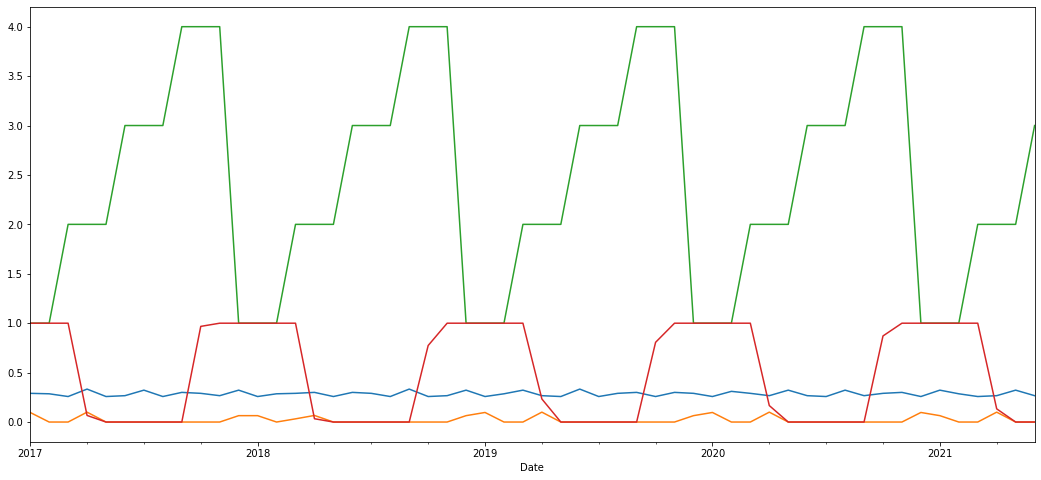

In [45]:
import seaborn as sns

# features.root_sales.resample('MS').mean().plot()
features.Weekend.resample('MS').mean().plot()
features.Holidays.resample('MS').mean().plot()
features.Season.resample('MS').mean().plot()
features.DST.resample('MS').mean().plot()



#### Categorical to Numerical

In [46]:
cat_df = features[[col for col in features.columns if features[col].dtype=="O"]]
cat_df

,Store,Location,Category,Branding
Date,,,,
2017-01-01,KMart,Wheelers Hill VIC 3170,Electronics,Sony
2017-01-02,KMart,Wheelers Hill VIC 3170,Electronics,Sony
2017-01-03,KMart,Wheelers Hill VIC 3170,Electronics,Sony
2017-01-04,KMart,Wheelers Hill VIC 3170,Electronics,Sony
2017-01-05,KMart,Wheelers Hill VIC 3170,Electronics,Sony
...,...,...,...,...
2021-06-26,SupaIGA,Mulgrave VIC 3170,Home & Kitchen,Westinghouse
2021-06-27,SupaIGA,Mulgrave VIC 3170,Home & Kitchen,Westinghouse
2021-06-28,SupaIGA,Mulgrave VIC 3170,Home & Kitchen,Westinghouse


In [47]:
cat_df = cat_df.apply(lambda x : pd.factorize(x)[0])
cat_df

,Store,Location,Category,Branding
Date,,,,
2017-01-01,0,0,0,0
2017-01-02,0,0,0,0
2017-01-03,0,0,0,0
2017-01-04,0,0,0,0
2017-01-05,0,0,0,0
...,...,...,...,...
2021-06-26,9,4,5,14
2021-06-27,9,4,5,14
2021-06-28,9,4,5,14


In [48]:
num_df = features[[x for x in features.columns if x not in cat_df]]

In [49]:
combined_df = pd.concat( [cat_df,num_df], axis=1)
combined_df = combined_df.dropna()

In [50]:
# Selecting columns with correlation less than 0.9
columns = np.full((combined_df.corr().shape[0],), True, dtype=bool)

for i in range(combined_df.corr().shape[0]):
    for j in range(i+1, combined_df.corr().shape[0]):
        if abs(combined_df.corr().iloc[i,j]) >= 0.9:
            if columns[j]:
                columns[j] = False
                
# selected_columns = features.columns[columns]




In [51]:
selected_columns = combined_df.corr().columns[columns]

combined_df = combined_df[selected_columns]

<AxesSubplot:>

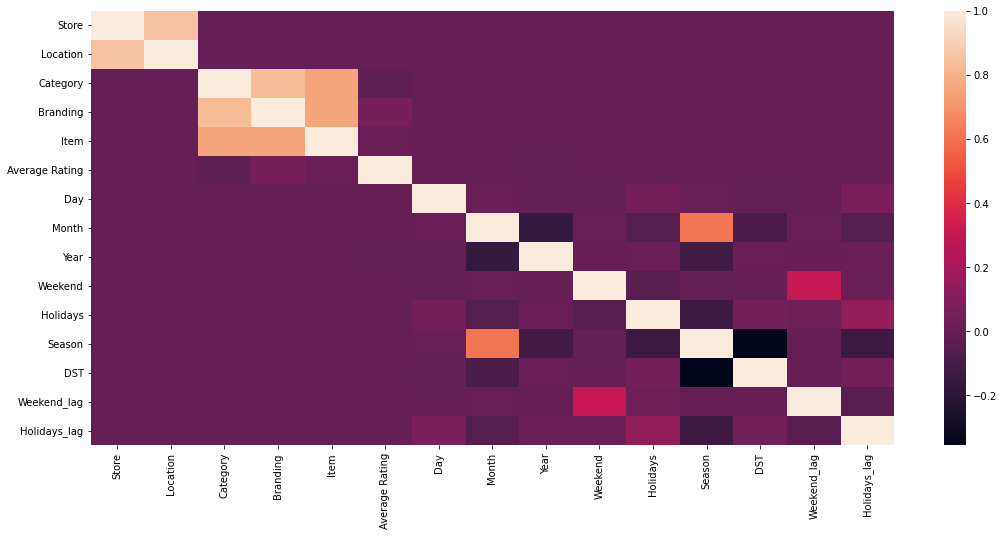

In [52]:
sns.heatmap(combined_df.corr())

# Models

In [53]:
combined_df.shape, target.shape[0]

((820999, 15), 821000)

In [54]:
from sklearn.model_selection import train_test_split

target = df_train.iloc[:,2]
target = target[1:]
# Split the data 

X_train,X_valid,y_train,y_valid = train_test_split(combined_df, target, test_size=.3,shuffle=False)
X_train

,Store,Location,Category,Branding,Item,Average Rating,Day,Month,Year,Weekend,Holidays,Season,DST,Weekend_lag,Holidays_lag
Date,,,,,,,,,,,,,,,
2017-01-02,0,0,0,0,1,1.4,2,1,2017,0,1,1,1,1.0,1.0
2017-01-03,0,0,0,0,1,1.8,3,1,2017,0,0,1,1,0.0,1.0
2017-01-04,0,0,0,0,1,1.3,4,1,2017,0,0,1,1,0.0,0.0
2017-01-05,0,0,0,0,1,2.9,5,1,2017,0,0,1,1,0.0,0.0
2017-01-06,0,0,0,0,1,1.8,6,1,2017,0,0,1,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,9,4,5,14,35,3.0,26,6,2021,1,0,3,0,0.0,0.0
2021-06-27,9,4,5,14,35,3.0,27,6,2021,1,0,3,0,1.0,0.0
2021-06-28,9,4,5,14,35,3.0,28,6,2021,0,0,3,0,1.0,0.0


In [55]:
from sklearn.model_selection import TimeSeriesSplit

TimeSeriesSplit(2)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

In [56]:
a = X_train.reset_index()

In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [60]:
combined_df.shape[0] * 0.7

574699.2999999999

In [61]:
train_df,test_df = combined_df[1:574699], combined_df[574699:]

In [62]:
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

C:\Users\prate\AppData\Local\Temp/ipykernel_26900/3475877761.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=s_s
C:\Users\prate\AppData\Local\Temp/ipykernel_26900/3475877761.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=s_s
C:\Users\prate\AppData\Local\Temp/ipykernel_26900/3475877761.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [63]:
def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [64]:
n_past = 180
n_future = 180 
n_features = 15

In [67]:
X_train, y_train = split_series(train.values,n_past, n_future)

MemoryError: Unable to allocate 11.6 GiB for an array with shape (574339, 180, 15) and data type float64

MemoryError: Unable to allocate 283. GiB for an array with shape (156816, 36, 53806) and data type uint8

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [ ]:
# E1D1
# n_features ==> no of features at each timestep in the data.
#
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)

encoder_states1 = encoder_outputs1[1:]

#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])

#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)

#
model_e1d1 = tf.keras.models.Model(encoder_inputs,decoder_outputs1)

#
model_e1d1.summary()

In [ ]:
# E2D2
# n_features ==> no of features at each timestep in the data.
#
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

In [ ]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)
model_e1d1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e1d1=model_e1d1.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])
model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2=model_e2d2.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])